In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import wrangle as w
import explore as e

In [2]:
# acquire and clean data
df, model_df = w.clean_df()

In [3]:
# split into train, validate and test
train, validate, test = w.split_data(df, "stroke")

In [4]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,...,is_child,gender_male,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
1877,female,3.00,0,0,0,children,rural,77.87,18.3,unknown,...,1,0,0,0,0,0,0,0,0,1
1314,male,45.00,0,0,1,private,rural,97.12,29.2,never smoked,...,0,1,0,0,1,0,0,1,0,0
3610,female,1.64,0,0,0,children,rural,82.49,15.1,unknown,...,1,0,0,0,0,0,0,0,0,1
3895,female,30.00,0,0,1,private,rural,124.37,21.4,never smoked,...,0,0,0,0,1,0,0,1,0,0
2374,male,58.00,0,0,0,self-employed,rural,170.93,30.7,unknown,...,0,1,0,0,0,1,0,0,0,1


gender


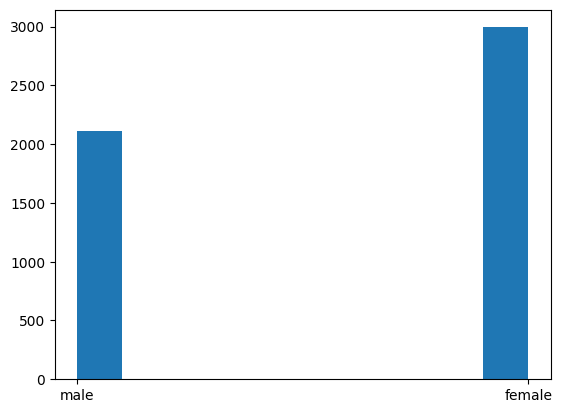

age


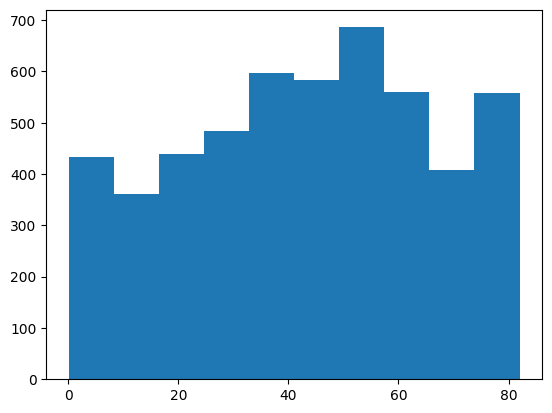

hypertension


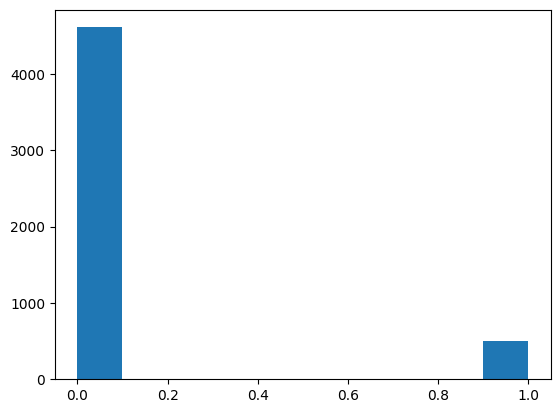

heart_disease


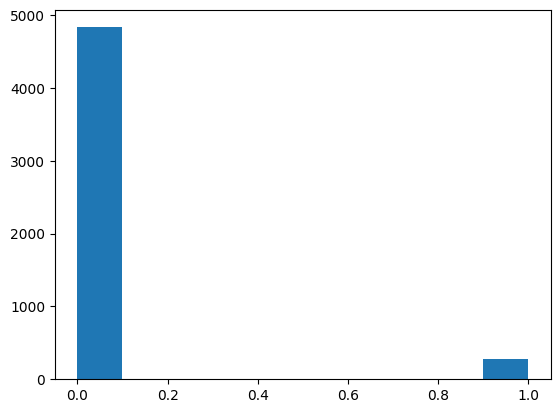

ever_married


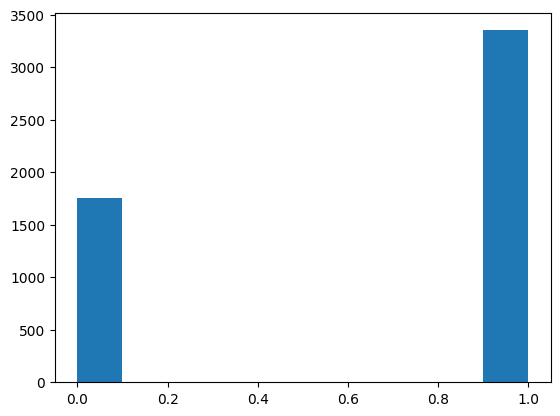

work_type


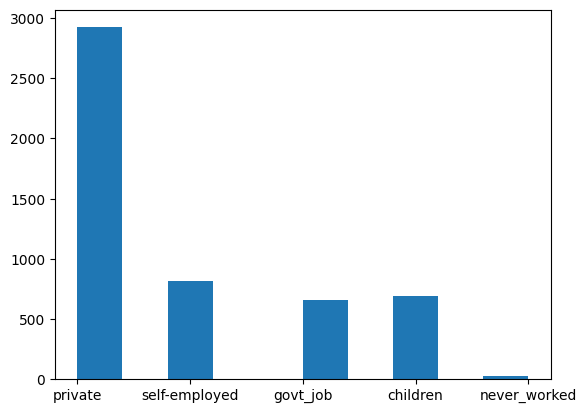

residence_type


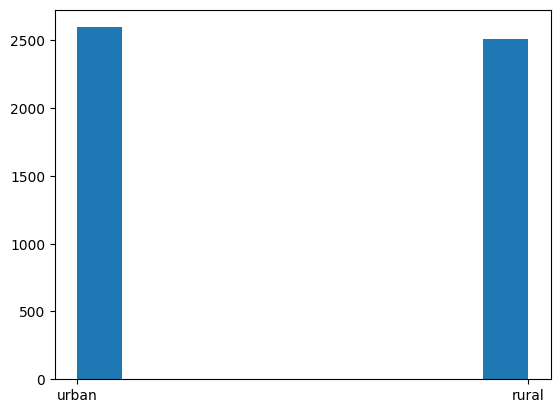

avg_glucose_level


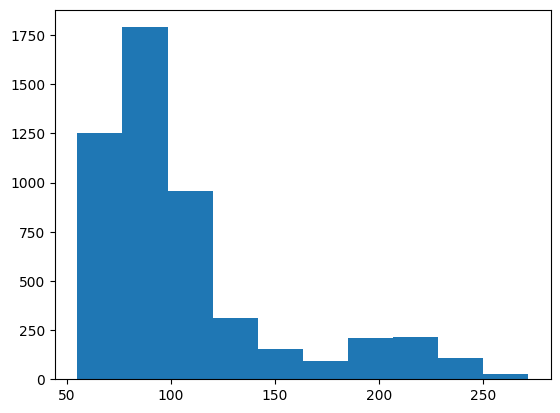

bmi


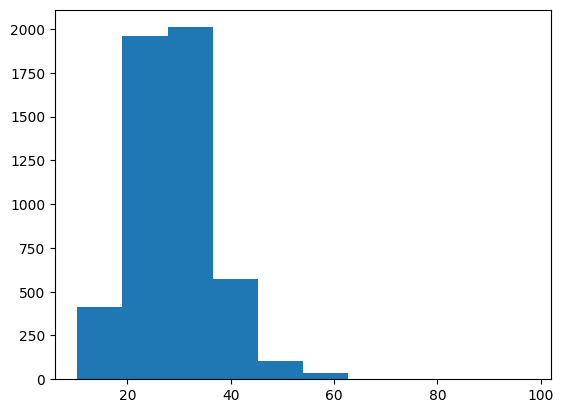

smoking_status


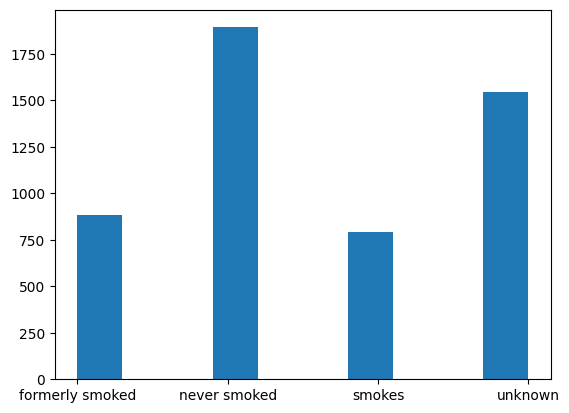

stroke


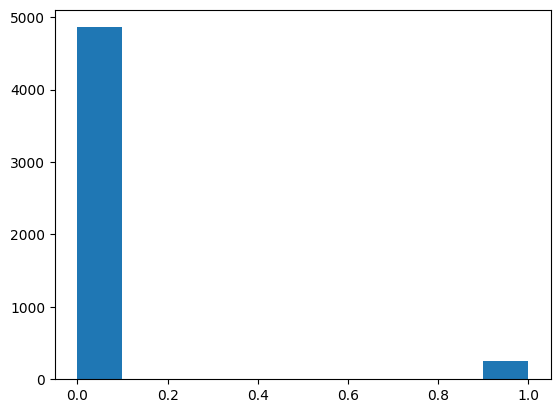

is_child


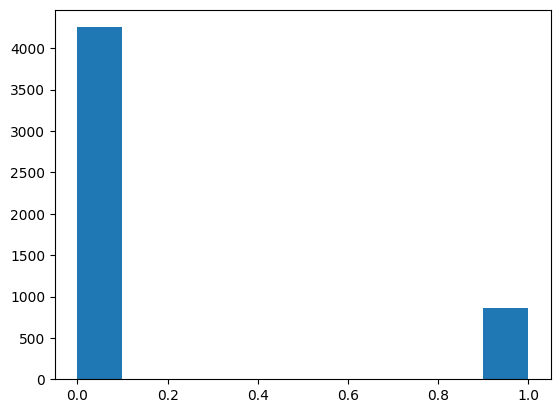

gender_male


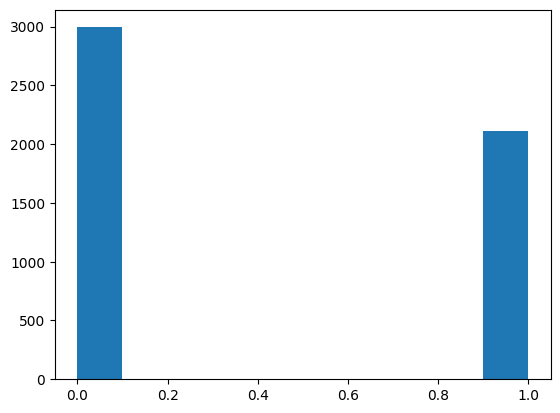

work_type_govt_job


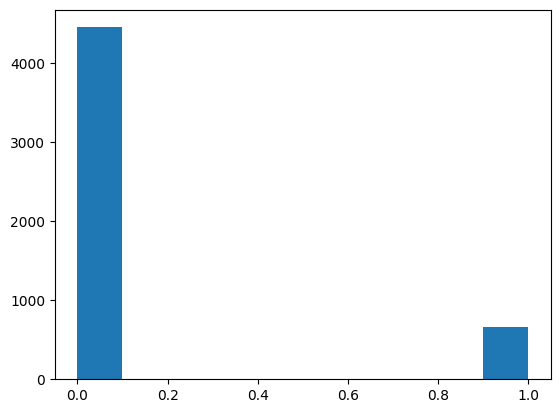

work_type_never_worked


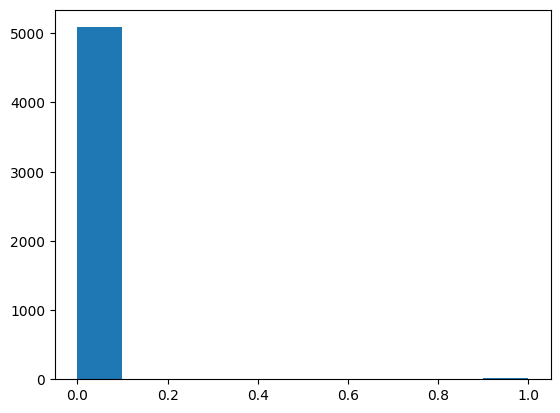

work_type_private


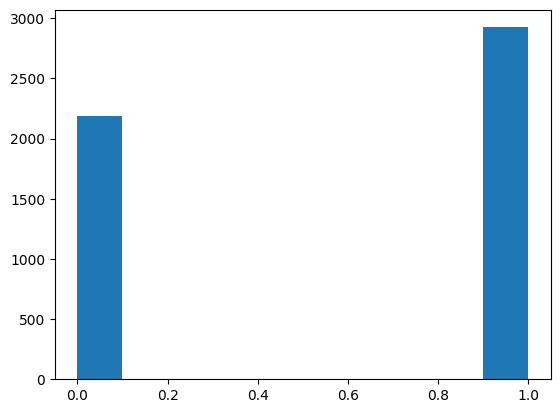

work_type_self-employed


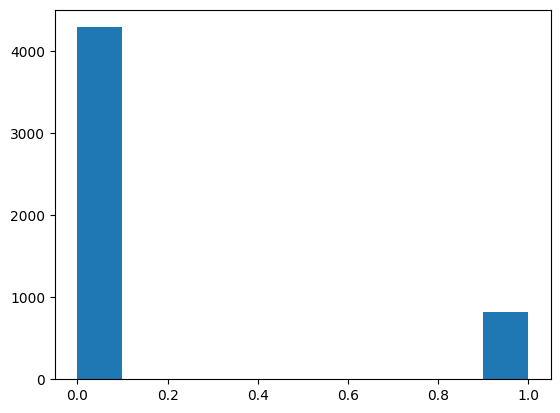

residence_type_urban


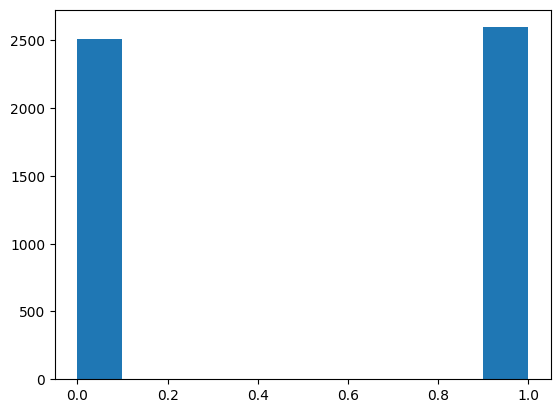

smoking_status_never smoked


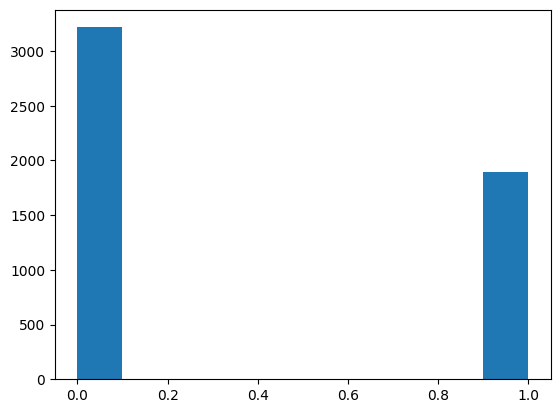

smoking_status_smokes


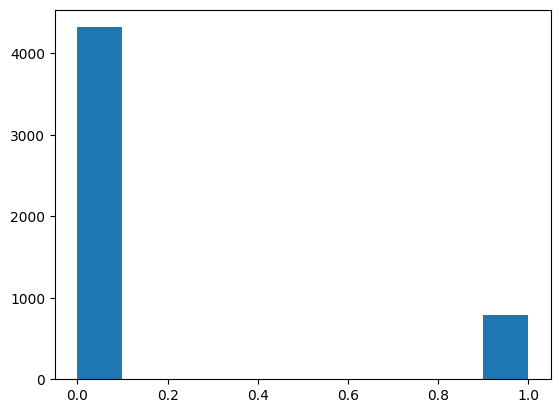

smoking_status_unknown


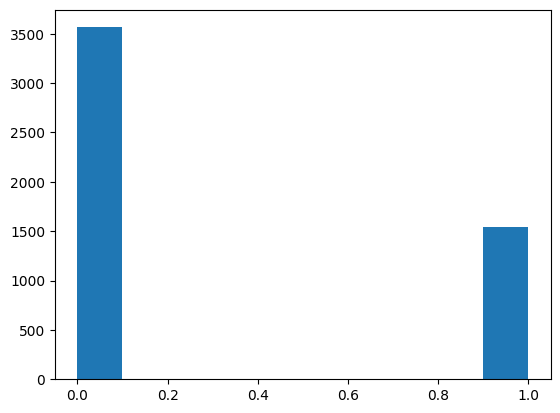

In [5]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

## Does Gender Affect Whether a Patient Stroke?
$H_o$: There is no relationship between gender and stroke

$H_a$: There is no relationship between gender and stroke

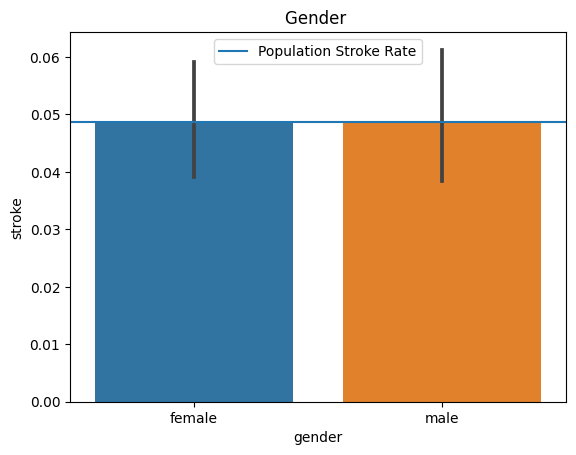

In [6]:
e.relationship_graph(train, "Gender ", "gender", "stroke")

In [7]:
e.chi_stats(train, "gender", "stroke")

,Chi-square statistic,p-value,Decision
0,0.0,1.0,Fail to Reject Null Hypothesis


The Chi-squared statistic indicates that there is no difference between the observed and expected frequencies.

## Does Hypertension Affect Whether a Patient Stroke?
$H_o$: There is no relationship between hypertension and stroke

$H_a$: There is no relationship between hypertension and stroke

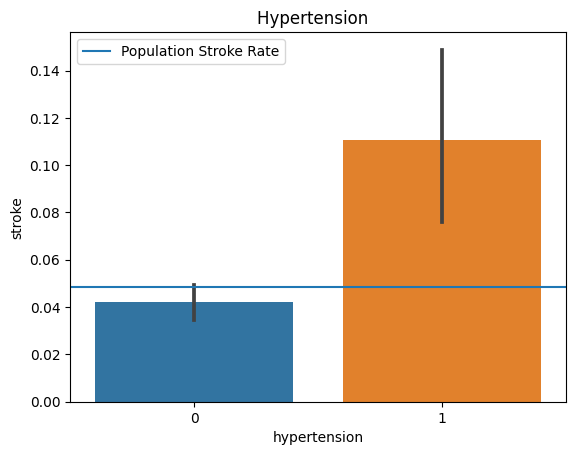

In [8]:
# visual graph
e.relationship_graph(train, "Hypertension  ", "hypertension", "stroke")

In [9]:
e.chi_stats(train, "hypertension", "stroke")

,Chi-square statistic,p-value,Decision
0,25.155198,5.289687e-07,Reject Null Hypothesis


The Chi-squared statistic indicates substantial difference between the observed and expected frequencies. People without hypertension were under the average and those with 

## Does Heart Disease Affect Whether a Patient Stroke?
$H_o$: There is no relationship between heart disease and stroke

$H_a$: There is no relationship between heart disease and stroke

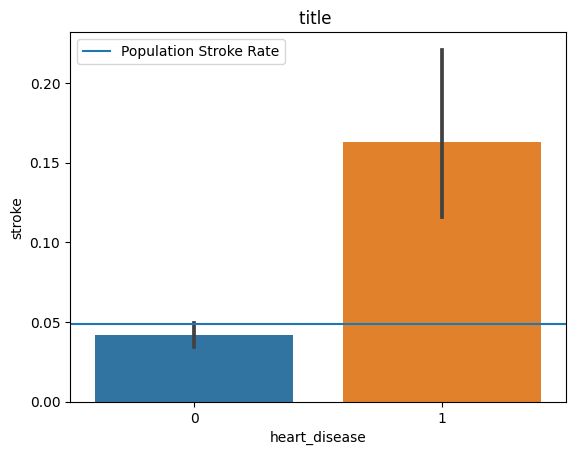

In [10]:
# visual graph
e.relationship_graph(train, "title ", "heart_disease", "stroke")

In [11]:
# statistical test
e.chi_stats(train, "heart_disease", "stroke")

,Chi-square statistic,p-value,Decision
0,48.781654,2.861035e-12,Reject Null Hypothesis


Any patient that have heart disease were likely to have a stroke than those who don't have heart disease.Based on this, I believe that using the 'heart_disease' feature in modeling will likely have a small positive impact on the model's accuracy.

## Does Being Married Affect Whether a Patient has a Stroke?
$H_o$: There is no relationship between ever_married and stroke

$H_a$: There is no relationship between ever_married and stroke

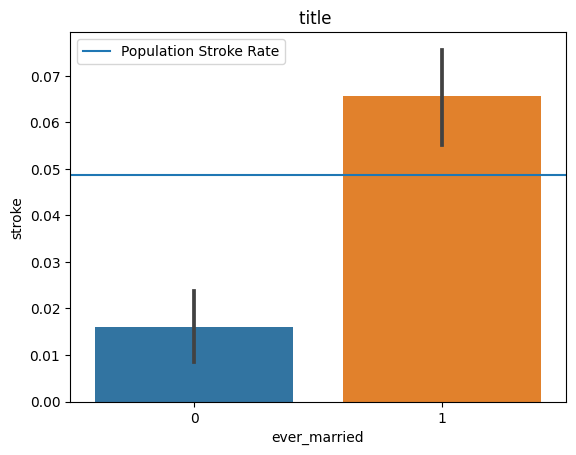

In [12]:
# visual graph
e.relationship_graph(train, "title ", "ever_married", "stroke")

In [13]:
# statistical test
e.chi_stats(train, "ever_married", "stroke")

,Chi-square statistic,p-value,Decision
0,35.6756,2.330649e-09,Reject Null Hypothesis


Any patient that was ever married appear to have strokes more often. than rural areas. However there is no statisical significance. Based on this, I believe that using the 'ever_married' feature in modeling will likely have a small positive impact on the model's accuracy.

## Does Residence Type Determine Whether a Patient Stroke?
$H_o$: There is no relationship between residence_type and stroke

$H_a$: There is no relationship between residence_type and stroke

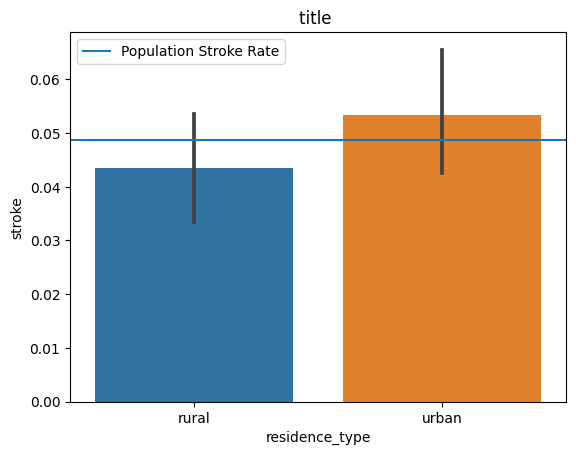

In [14]:
# visual graph
e.relationship_graph(train, "title ", "residence_type", "stroke")

In [15]:
# statistical test
e.chi_stats(train, "residence_type", "stroke")

,Chi-square statistic,p-value,Decision
0,1.415285,0.234181,Fail to Reject Null Hypothesis


Any patient that live in urban areas appear that strokes occur more often than rural areas. However there is no statisical significance. Based on this, I believe that it is not likely that "residence_type" will not be a useful feature to model on.

## Does Smoking Status Type Determine Whether a Patient Stroke?
$H_o$: There is no relationship between smoking_status and stroke

$H_a$: There is no relationship between smoking_status and stroke

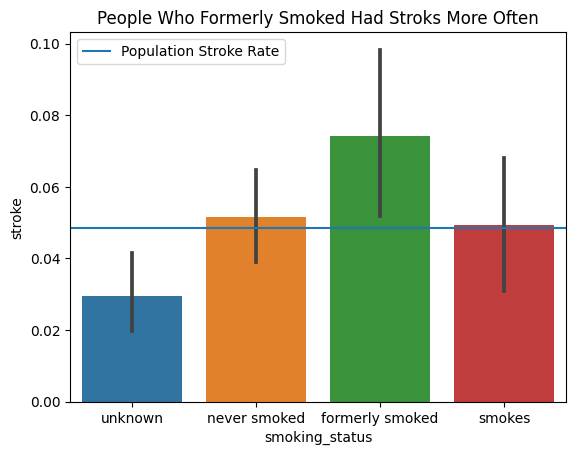

In [16]:
# visual graph
e.relationship_graph(train, "People Who Formerly Smoked Had Stroks More Often", "smoking_status", "stroke")

In [17]:
# statistical test
e.chi_stats(train, "smoking_status", "stroke")

,Chi-square statistic,p-value,Decision
0,14.997464,0.001819,Reject Null Hypothesis


Any patient that have smoked were likely to have a stroke, those who formerly smoked had higher amounts of strokes, where as smoke doesn't this maybe related to age. Based on this, I believe that using the 'smoking_status' feature in modeling will likely have a small positive impact on the model's accuracy.

## Does Being a Child Determine Whether a Patient Stroke?
$H_o$: There is no relationship between is_child and stroke

$H_a$: There is no relationship between is_child and stroke

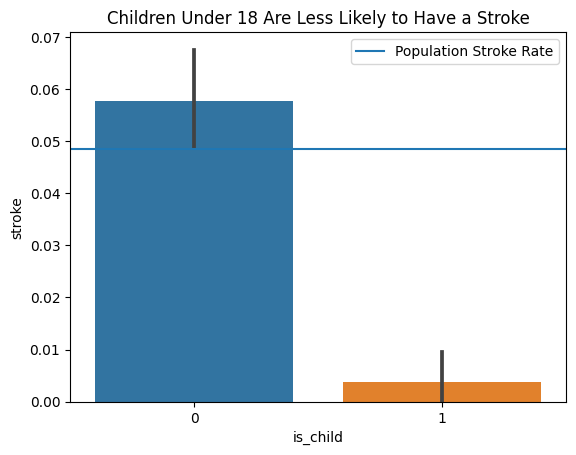

In [18]:
# visual graph
e.relationship_graph(train, "Children Under 18 Are Less Likely to Have a Stroke", "is_child", "stroke")

In [19]:
# statistical test
e.chi_stats(train, "is_child", "stroke")

,Chi-square statistic,p-value,Decision
0,26.125698,3.198981e-07,Reject Null Hypothesis


Children were less likely to suffer from a stroke, than adult. Based on this, I believe that using the 'is_child' feature in modeling will likely have a small positive impact on the model's accuracy.